# Atelier 2 : Données manquantes, biais, déséquilibres de classes
Dans ce TP, nous allons explorer plusieurs étapes cruciales pour la préparation de données avant leur utilisation dans un modèle de machine learning. Nous utiliserons des données hospitalières pour illustrer les concepts abordés.

N'oubliez pas d'explorer la documentation pour chaque fonction que vous utilisez et d'approfondir vos connaissances sur chaque méthode !
> **Ressources utiles** :
> - [Documentation de Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
> - [Documentation de Scikit-learn](https://scikit-learn.org/stable/documentation.html)
> - [Documentation de Imbalanced-learn](https://imbalanced-learn.org/stable/index.html)

##### 🔄 Chargement des données
Commençons par charger les jeux de données JSON et CSV fournis. Nous utiliserons la bibliothèque `pandas` pour cela.

> **Astuce** : Consultez la [documentation de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) si vous avez des doutes sur les options de la fonction `read_csv`.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer


%matplotlib inline

df_dc = pd.read_csv('diabetes_custom.csv')
df_dc.head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Country,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,97.42,170.28,India,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,69.10,161.18,USA,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,55.74,154.67,India,1


##### 📈 Visualiser la distribution des données
Utilisez la méthode `hist()` de la classe DataFrame pour afficher l'histogramme des différentes colonnes des jeux de données.

❓ **Question** : Que remarquez-vous d'anormal ?

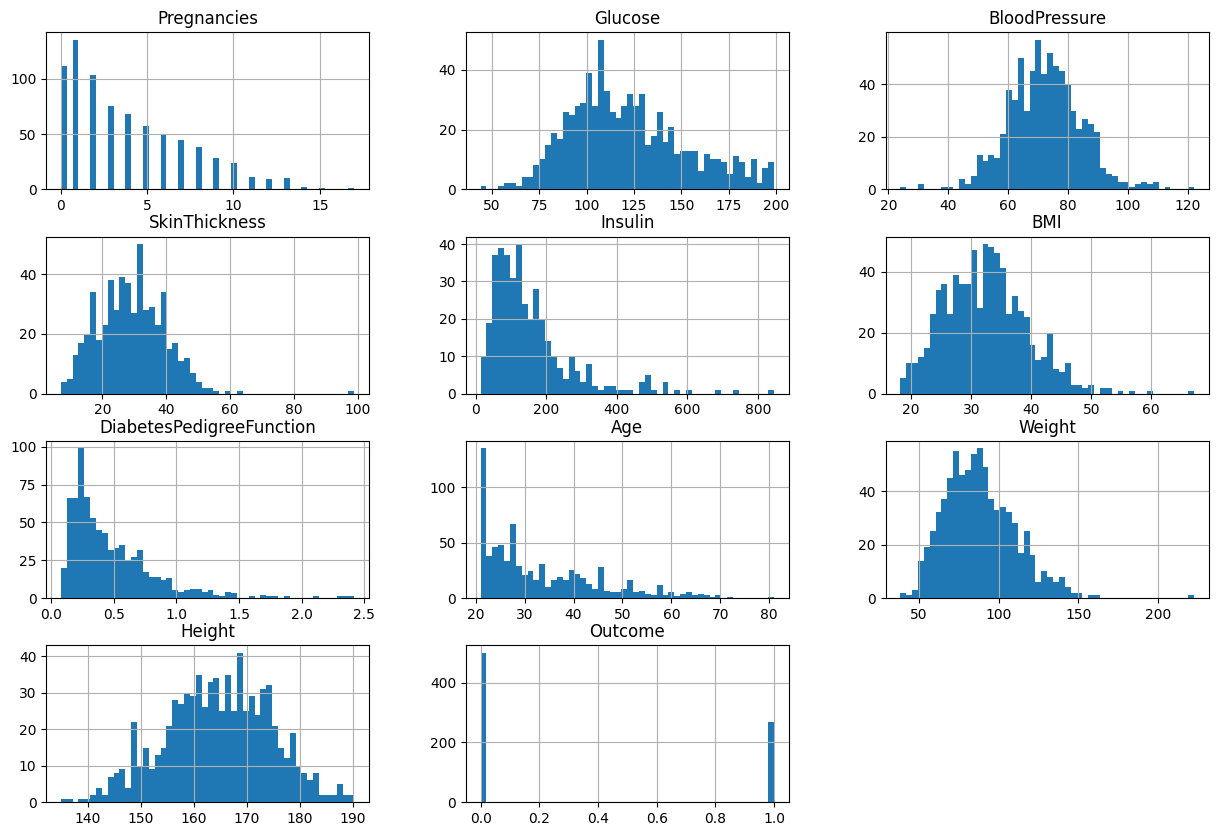

In [23]:
hist_df_dc = df_dc.hist(bins=50, figsize=(15, 10))

**Il y a des valeurs abérrantes dans certaines colonnes.**

#### 🏷️ Étape 1 : Gestion des Variables Catégorielles
Convertir les variables catégorielles en variables numériques à l'aide de techniques telles que le `OneHotEncoding` et le `LabelEncoding`.

❓ **Question** : Dans notre cas, quelle méthode privilégier ? Pourquoi

In [24]:
# OneHotEncoding
df_encoded = pd.get_dummies(data = df_dc, columns=['Country'])
df_encoded.head(3)
#on change la colonne Country en 3 colonnes Country_France, Country_Germany, Country_Spain


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Outcome,Country_France,Country_India,Country_USA
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,97.42,170.28,1,False,True,False
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,69.10,161.18,0,False,False,True
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,55.74,154.67,1,False,True,False


In [25]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_label_encoded = df_dc.copy()
df_label_encoded['Country'] = le.fit_transform(df_label_encoded['Country'])
df_label_encoded.head(3)
# 0 pour France, 1 pour Germany, 2 pour Spain


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Country,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,97.42,170.28,1,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,69.10,161.18,2,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,55.74,154.67,1,1


**On va plutôt utiliser le OneHotEncoding pour les pays car pas de notion d'ordre entre les pays.**

#### 🔧 Complétion des valeurs manquantes
Il est courant de rencontrer des valeurs manquantes dans les jeux de données. Dans cette section, il vous est demandé de traiter le problème avec différentes méthodes :

1. **Suppression des lignes avec valeurs manquantes**
   Écrivez une fonction qui vous permet de supprimer les lignes contenant des valeurs nulles. Utilisez la méthode `dropna` de la classe DataFrame.  
   ❓ **Question** : Comparez la taille des jeux de données avant et après retrait des individus présentant des valeurs manquantes. Quelles sont les limites de cette méthode ?

2. **Remplacement par la moyenne/médiane/mode**
   Remplacez les valeurs NaN par la moyenne observée dans la colonne.

3. **Interpolation linéaire**
   Utilisez la méthode `interpolate()` de la classe `Serie` pour compléter les valeurs manquantes.  
   ❓ **Question** : Que fait exactement la méthode `interpolate()` ? (Référez-vous à la documentation de pandas)

4. **Imputation des valeurs par méthode K-Nearest Neighbour (KNN)**
   Utilisez la classe `KNNImputer` de la bibliothèque sklearn pour compléter les valeurs manquantes.  
   ❓ **Question** : Que fait exactement cette méthode ? (Référez-vous à la documentation de pandas)

**Note** : Certaines de ces méthodes convertissent les colonnes exprimées à travers des valeurs entières en flottants. Assurez-vous de convertir manuellement les colonnes concernées (Pregnancies, Age, etc.) en entiers après coup.

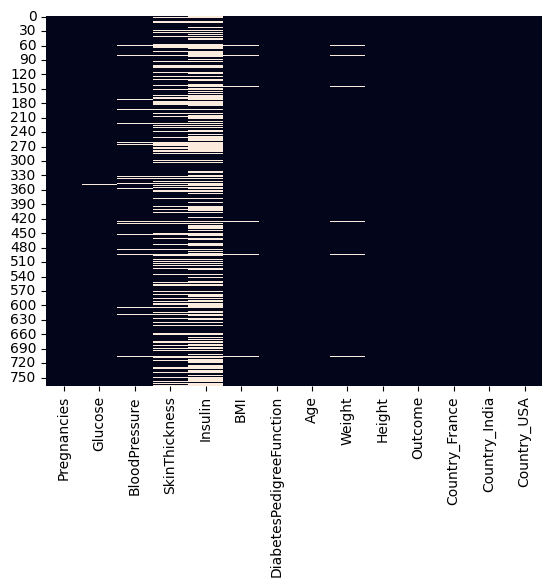

In [26]:
# Afficher un aperçu des valeurs manquantes (méthode isna())
import seaborn


na_columns = df_encoded.columns[df_encoded.isna().any()].tolist()
na_columns2 = seaborn.heatmap(df_encoded.isna(), cbar=False)

In [27]:
df_encoded

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Outcome,Country_France,Country_India,Country_USA
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,97.42,170.28,1,False,True,False
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,69.10,161.18,0,False,False,True
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,55.74,154.67,1,False,True,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,85.94,174.88,0,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,122.27,168.43,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,97.90,172.50,0,True,False,False
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,110.49,173.27,0,True,False,False
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,73.20,167.15,0,False,True,False
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,94.50,177.19,1,True,False,False


In [28]:
# 1. Suppression des lignes avec valeurs manquantes
df_dropped = df_encoded.copy().dropna()
df_dropped


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Outcome,Country_France,Country_India,Country_USA
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,85.94,174.88,0,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,122.27,168.43,1,False,True,False
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,81.01,161.66,1,True,False,False
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,85.77,167.69,1,True,False,False
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,89.87,172.79,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,117.44,164.69,1,False,True,False
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,92.43,159.13,1,False,False,True
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,59.20,144.37,0,True,False,False
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,97.90,172.50,0,True,False,False


**On passe de 768 lignes à 392 lignes, donc on a supprimé une grande parties des valeurs.**

In [29]:
# 2. Remplacement par la moyenne/médiane
def fill_na(df, cols):
    int_columns = df.select_dtypes(include='int').columns.tolist()
    df_filled = df.copy()
    for col in cols:
        df_filled[col] = df[col].fillna(df[col].mean())
        
    df_filled[int_columns] = df[int_columns].round(0).astype(int)

    return df_filled

df_filled = fill_na(df_encoded, na_columns)
df_filled


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Outcome,Country_France,Country_India,Country_USA
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,97.42,170.28,1,False,True,False
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,69.10,161.18,0,False,False,True
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,55.74,154.67,1,False,True,False
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,85.94,174.88,0,True,False,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,122.27,168.43,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,97.90,172.50,0,True,False,False
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,110.49,173.27,0,True,False,False
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,73.20,167.15,0,False,True,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,94.50,177.19,1,True,False,False


In [30]:
# 3. Interpolation linéaire pour les valeurs manquantes
def interpolate(df, cols):
    int_columns = df.select_dtypes(include='int').columns.tolist()
    df_interpolated = df.copy()
    for col in cols:
        df_interpolated[col] = df_interpolated[col].interpolate(method='linear')
        df_interpolated[col] = df_interpolated[col].fillna(df[col].mean()) # Pour remplir éventuellement les individus nan en tête de colonne

    df_interpolated[int_columns] = df[int_columns].round(0).astype(int)
    
    return df_interpolated


df_interpolated = interpolate(df_encoded, na_columns)

df_interpolated


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Outcome,Country_France,Country_India,Country_USA
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50,97.42,170.28,1,False,True,False
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31,69.10,161.18,0,False,False,True
2,8,183.0,64.0,26.0,155.548223,23.3,0.672,32,55.74,154.67,1,False,True,False
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,85.94,174.88,0,True,False,False
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,122.27,168.43,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,97.90,172.50,0,True,False,False
764,2,122.0,70.0,27.0,146.000000,36.8,0.340,27,110.49,173.27,0,True,False,False
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,73.20,167.15,0,False,True,False
766,1,126.0,60.0,27.0,112.000000,30.1,0.349,47,94.50,177.19,1,True,False,False


**La méthode interpolate() permet de remplacer une valeur manquante par une valeur en fonction des lignes adjointes.**

In [31]:
# 4. Imputation KNN

def data_imputation(df, cols = []):
    int_columns = df.select_dtypes(include='int').columns.tolist()
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = df.copy()

    # A compléter
    df_imputed[cols] = imputer.fit_transform(df_imputed[cols])

    df_imputed[int_columns] = df_imputed[int_columns].round(0).astype(int)

    return df_imputed

df_imputed = data_imputation(df_encoded, na_columns)

df_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Outcome,Country_France,Country_India,Country_USA
0,6,148.0,72.0,35.0,203.4,33.6,0.627,50,97.42,170.28,1,False,True,False
1,1,85.0,66.0,29.0,78.6,26.6,0.351,31,69.10,161.18,0,False,False,True
2,8,183.0,64.0,24.4,236.4,23.3,0.672,32,55.74,154.67,1,False,True,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,85.94,174.88,0,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,122.27,168.43,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,97.90,172.50,0,True,False,False
764,2,122.0,70.0,27.0,135.2,36.8,0.340,27,110.49,173.27,0,True,False,False
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,73.20,167.15,0,False,True,False
766,1,126.0,60.0,21.8,130.4,30.1,0.349,47,94.50,177.19,1,True,False,False


**Cette méthode remplace les valeurs manquantes par une moyenne de ses plus proches voisins.**

#### 📊 Biais d'outlier et détection des valeurs aberrantes
Certains modèles d'intelligence artificielle sont très sensibles à la présence d'individus qui sont éloignés de la moyenne du jeux de données (Outliers). Une tâche préalable consiste donc à détecter et supprimer ces individus. Pour détecter des outliers, différents algorithmes peuvent être utilisés. Ici nous utiliserons une simple méthode statistique, consistant à déterminer, sur chaque dimension, si un outlier est au-delà de 2 ecart-types. 

1. Ecrire une fonction qui ajoute une colonne à un dataframe indiquant le nombre de dimension pour lequel chaque individu peut-être considéré comme un outlier.
2. Ecrire une fonction qui élimine les individus ayant plus de 3 dimensions trop éloignées de la moyenne.

In [32]:
def detect_outliers(df, num_std=2, threshold=1):
    df_outliers = df.copy()
    means = df_outliers.mean()
    stds = df_outliers.std()
    df_outliers['Outlier_Count'] = ((df_outliers - means).abs() > num_std * stds).sum(axis=1)

    return df_outliers


def remove_outliers(df, threshold):
    df_with_outliers = detect_outliers(df)
    df_without_outliers = df_with_outliers[df_with_outliers['Outlier_Count'] <= threshold].drop(columns='Outlier_Count')
    return df_without_outliers


df_outliers = remove_outliers(df_imputed,2)
df_outliers



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Outcome,Country_France,Country_India,Country_USA
0,6,148.0,72.0,35.0,203.4,33.6,0.627,50,97.42,170.28,1,False,True,False
1,1,85.0,66.0,29.0,78.6,26.6,0.351,31,69.10,161.18,0,False,False,True
2,8,183.0,64.0,24.4,236.4,23.3,0.672,32,55.74,154.67,1,False,True,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,85.94,174.88,0,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,122.27,168.43,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,97.90,172.50,0,True,False,False
764,2,122.0,70.0,27.0,135.2,36.8,0.340,27,110.49,173.27,0,True,False,False
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,73.20,167.15,0,False,True,False
766,1,126.0,60.0,21.8,130.4,30.1,0.349,47,94.50,177.19,1,True,False,False


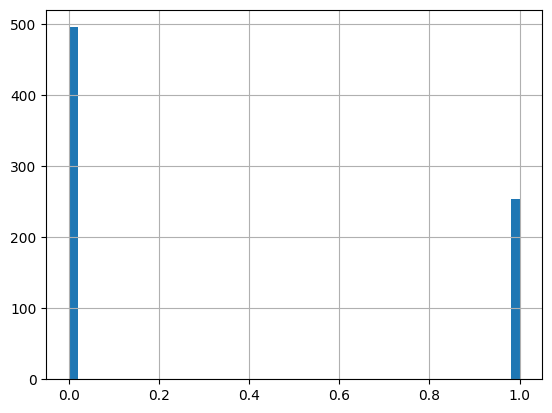

In [33]:
hist_df_outliers = df_outliers['Outcome'].hist(bins=50)

#### ⚖️ Gestion du Déséquilibre de Classe

Le jeu de données peut présenter un déséquilibre dans les classes de la variable `Outcome`. Cela signifie qu'une classe peut être beaucoup plus représentée que l'autre, ce qui a pour effet de biaiser les modèles prédictifs en favorisant les prédictions vers la classe sur-représentée. Dans notre cas, la colonne `Outcome`, qui traduit le résultat d'un diagnostic présente un déséquilibre de représentation. Les performances d'un modèle visant à prédire le diagnostic d'un patient sur la base des autres colonnes du dataset seront nécessairement affectées par ce déséquilibre. Nous allons explorer plusieurs techniques pour traiter ce problème :

1. **Undersampling** : Réduction des individus de la classe majoritaire par suppression d'individus.
2. **Oversampling** : Génération de nouveaux individus de la classe minoritaire par échantillonage avec remise sur les individus existantes.
3. **SMOTE** (Synthetic Minority Over-sampling Technique) : Génération d'individus synthétiques de la classe minoritaire dans le voisinage des instances existantes.

Afficher la distribution des classes pour constater le déséquilibre

A partir du code fonurni ci-dessous, écrire trois fonctions réalisant l'oversampling, l'undersampling et appliquant la méthode SMOTE. Pour cela, vous pourrez utiliser la fonction `resample` de la bibliothèque `sklearn.utils` qui permet de réaliser un échantillonage parmis les individus d'un dataframe.
  
❓ **Question** : Quels sont les avantages et inconvénients de chaque méthode ? L'oversampling par échantillonage entre notamment en conflit avec un principe évoqué lors de l'atelier 1. Lequel ? Quel risque cela engendre-t-il ?

**Oversampling**

-Avantages :

Évite de perdre des données de la classe majoritaire.
Améliore la capacité du modèle à prédire la classe minoritaire.

-Inconvénients :

Conflit avec le principe d'indépendance des données (évoqué lors de l'atelier 1) : la duplication d'échantillons peut entraîner une sur-représentation artificielle et biaiser l'évaluation du modèle, notamment en cas de sur-apprentissage.
Augmente le risque d'overfitting car les exemples sont simplement dupliqués sans ajouter de diversité.

**Undersampling**

-Avantages :

Réduit le temps de calcul, car le jeu de données devient plus petit.
Réduit les biais en équilibrant les classes sans créer d'exemples artificiels.

-Inconvénients :

Risque de perte d'informations pertinentes en supprimant des exemples de la classe majoritaire.
Peut entraîner un modèle sous-performant si les données supprimées sont importantes pour apprendre des tendances générales.

**SMOTE**

-Avantages :

Évite les duplications directes, ce qui réduit le risque d'overfitting par rapport à l'oversampling classique.
Introduit de la diversité dans la classe minoritaire.

-Inconvénients :

Peut générer des exemples synthétiques non réalistes (situés en dehors de la distribution réelle).
Plus complexe et plus coûteux en temps de calcul.


In [34]:
print(df_outliers['Outcome'].value_counts())

def get_majority_class_df(df,column):
    df_majority = df[df[column] == 0]
    return df_majority

def get_minority_class_df(df,column):
    df_minority = df[df[column] == 1]
    return df_minority

def oversampling(df):
    df_minority = get_minority_class_df(df,'Outcome')
    df_majority = get_majority_class_df(df,'Outcome')
    df_minority_oversampled = resample(df_minority, 
                                       replace=True,    
                                       n_samples=len(df_majority),     
                                       random_state=42) 
    df_oversampled = pd.concat([df_majority, df_minority_oversampled])
    return df_oversampled

def undersampling(df):
    df_minority = get_minority_class_df(df,'Outcome')
    df_majority = get_majority_class_df(df,'Outcome')
    df_majority_undersampled = resample(df_majority, 
                                        replace=False,    
                                        n_samples=len(df_minority),     
                                        random_state=42) 
    df_undersampled = pd.concat([df_majority_undersampled, df_minority])
    return df_undersampled

def smote(df):
    X = df.drop('Outcome', axis=1)  
    y = df['Outcome']  
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)
    df_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['Outcome'])], axis=1)
    return df_smote

df_under = undersampling(df_imputed)
df_over = oversampling(df_imputed)
df_smote = smote(df_imputed)
df_smote

Outcome
0    495
1    254
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Country_France,Country_India,Country_USA,Outcome
0,6,148.000000,72.000000,35.000000,203.400000,33.600000,0.627000,50,97.420000,170.280000,False,True,False,1
1,1,85.000000,66.000000,29.000000,78.600000,26.600000,0.351000,31,69.100000,161.180000,False,False,True,0
2,8,183.000000,64.000000,24.400000,236.400000,23.300000,0.672000,32,55.740000,154.670000,False,True,False,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,85.940000,174.880000,True,False,False,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,122.270000,168.430000,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,158.397559,72.024409,32.501480,252.633134,31.122929,0.664942,31,87.983121,168.165188,False,True,False,1
996,3,123.074061,75.771850,32.325553,148.448157,32.319814,0.255139,23,100.941465,176.759449,True,False,False,1
997,3,175.361816,82.596354,24.234537,158.552735,32.534180,0.985307,47,87.267501,163.716071,True,True,False,1
998,1,95.538055,81.892389,26.076109,180.591860,34.930053,0.258719,42,101.249004,170.245302,True,False,False,1


#### 📊 Qualité des données après complétion des données manquantes et gestion du déséquilibre de classe
On souhaite s'assurer que la complétion des valeurs manquantes et la gestion du déséquilibre de classe n'ont pas modifié la répartition globale du jeu de données. Pour cela, une approche consiste à comparer statistiquement les deux jeux de données.

Écrivez une fonction qui compare les descriptifs statistiques de deux DataFrames. Cette fonction crée un DataFrame qui récupère pour chaque colonne :
1. La différence relative des moyennes entre chaque DataFrame
2. La différence relative des écarts-types

Pour cela, vous pourrez utiliser les méthodes `mean()`, `median()`, et `std()` des classes `DataFrame` et `Series`.

Avec cette fonction, comparez le DataFrame initial, le DataFrame après complétion des valeurs manquantes et le DataFrame après rééquilibrage des classes.


In [35]:
def compare_stats(df1, df2):
    stats_diff = pd.DataFrame(index=df1.columns, columns=['Mean_Diff', 'Std_Diff'])
    
    stats_diff['Mean_Diff'] = ((df2.mean() - df1.mean()) / df1.mean()).abs()
    stats_diff['Std_Diff'] = ((df2.std() - df1.std()) / df1.std()).abs()
    
    return stats_diff

df_stats_comp_after_completion = compare_stats(df_encoded, df_dropped)
df_stats_comp_after_balance = compare_stats(df_encoded, df_smote)

df_stats_comp_after_completion, df_stats_comp_after_balance
df_stats_comp_after_completion


,Mean_Diff,Std_Diff
Pregnancies,0.141489,0.046936
Glucose,0.007731,0.010648
BloodPressure,0.024058,0.009201
SkinThickness,0.000275,0.003765
Insulin,0.003265,0.000554
BMI,0.019372,0.014826
DiabetesPedigreeFunction,0.108439,0.042735
Age,0.071481,0.132604
Weight,0.020274,0.022906
Height,0.000393,0.028431


#### ⚖️ Biais de sélection
Le biais de sélection se produit lorsque les données choisies ne sont pas représentatives de la population réelle. Dans notre cas, le jeu de données concerne des femmes de plusieurs nationalités (France, USA, Inde). 
Nous cherchons à obtenir un nombre d'individus par pays qui soit identique, afin d'éviter de construire un modèle biaisé par la sur-représentation d'individus d'un même pays. Affichez le nombre d'individus pour chaque nationalité.

**Question :** Proposez une stratégie pour éviter le biais de sélection des différents pays. Quel problème risque-t-on de rencontrer vis-à-vis de l'équilibre des classes ?

In [36]:
# Compter le nombre d'individus par nationalité
print(df_imputed['Country_France'].value_counts())
print(df_imputed['Country_India'].value_counts())
print(df_imputed['Country_USA'].value_counts())

Country_France
False    529
True     239
Name: count, dtype: int64
Country_India
False    508
True     260
Name: count, dtype: int64
Country_USA
False    499
True     269
Name: count, dtype: int64


La méthode que j'utiliserai pour éviter le biais de sélection des différents pays est:

Effectuer un oversampling ou undersampling pour equilibrer les effectifs.

On risque de déséquilibrer les résultats. En effet : 

Si la nationalité sur-représentée est également celle qui contient davantage d'exemples d'une classe cible particulière, la réduction de ses effectifs peut déséquilibrer la classe cible.

À l'inverse, sur-échantillonner des nationalités sous-représentées peut introduire un biais artificiel dans la classe cible. 

#### 🚦 Biais de représentation des classes dans les groupes de données
Un autre biais, plus important, lié au pays doit être évité. Parmi les pays représentés, certains (Inde, USA) présentent une proportion plus élevée de leur population atteinte du diabète. Cependant, il est crucial que cette prévalence ne soit pas représentée dans les données, car cela risquerait de biaiser le modèle, qui pourrait prédire de manière plus favorable un cas de diabète pour des patients indiens que pour des patients français, par exemple.

Vérifiez la répartition des individus du jeu de données par rapport à leur pays d'origine. Quelle remarque faites vous ?

**Question :** Proposez une stratégie pour éviter le biais lié à un éventuel déséquilibre.

In [37]:
print(df_imputed.groupby('Country_France')['Outcome'].value_counts(normalize=True))
print('-------------------')
print(df_imputed.groupby('Country_India')['Outcome'].value_counts(normalize=True))
print('-------------------')
print(df_imputed.groupby('Country_USA')['Outcome'].value_counts(normalize=True))

Country_France  Outcome
False           0          0.654064
                1          0.345936
True            0          0.644351
                1          0.355649
Name: proportion, dtype: float64
-------------------
Country_India  Outcome
False          0          0.651575
               1          0.348425
True           0          0.650000
               1          0.350000
Name: proportion, dtype: float64
-------------------
Country_USA  Outcome
False        0          0.647295
             1          0.352705
True         0          0.657993
             1          0.342007
Name: proportion, dtype: float64


**Pour éviter le biais lié à un éventuel déséquilibre, on pourrait égalisez les effectifs par pays et par classe, en utilisant une méthode combinée de sous-échantillonnage et sur-échantillonnage.**

#### 📏 Normalisation des Données
La normalisation des données est une étape primordiale avant l'entrainement de certain modèles de Machine Learning. Elle permet en particulier de limiter les déséquilibre relatifs aux ordre de grandeur dans lequel sont exprimées les features (colonnes) d'un jeu de données. En effet, un certain nombre d'algorithmes, que nous verrons plus tard, se basent sur des méthodes de calcul de distances (K-Means, KNN, SVM) ou sur l'algorithme de rescente du gradient (Régression linéaires, régression logistique, réseaux de neurones). Tous ces modèles seraient donc affectés en performance et en temps de convergence par des données pour lesquelles les échelles ne sont pas normalisées.

1. **Standardisation** : Transforme les données vers une distribution centrée sur 0 avec un écart-type de 1.
2. **Min-Max Scaling** : Ramène les données dans une échelle de 0 à 1.

Vous pourrez utiliser les classes `MinMax` et  `StandardScaler` de la bibliothèque `sklearn.preprocessing`.

In [38]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaling(df):
    scaler = MinMaxScaler()
    
    outcome = df['Outcome']
    features = df.drop(columns=['Outcome'])
    
    features_scaled = scaler.fit_transform(features)
    
    df_normalized = pd.DataFrame(features_scaled, columns=features.columns)
    
    df_normalized['Outcome'] = outcome
    
    return df_normalized

df_normalized = min_max_scaling(df_imputed)
df_normalized


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Country_France,Country_India,Country_USA,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.227644,0.314928,0.234415,0.483333,0.320425,0.638874,0.0,1.0,0.0,1
1,0.058824,0.264516,0.428571,0.239130,0.077644,0.171779,0.116567,0.166667,0.166829,0.474644,0.0,0.0,1.0,0
2,0.470588,0.896774,0.408163,0.189130,0.267308,0.104294,0.253629,0.183333,0.094370,0.357156,0.0,1.0,0.0,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.258162,0.721891,1.0,0.0,0.0,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0.455201,0.605486,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.323029,0.678939,1.0,0.0,0.0,0
764,0.117647,0.503226,0.469388,0.217391,0.145673,0.380368,0.111870,0.100000,0.391311,0.692835,1.0,0.0,0.0,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.189066,0.582386,0.0,1.0,0.0,0
766,0.058824,0.529032,0.367347,0.160870,0.139904,0.243354,0.115713,0.433333,0.304588,0.763581,1.0,0.0,0.0,1


In [39]:
from sklearn.preprocessing import StandardScaler

def standardisation(df):
    scaler = StandardScaler()
    
    outcome = df['Outcome']
    features = df.drop(columns=['Outcome'])
    
    features_standardized = scaler.fit_transform(features)
    
    df_standardized = pd.DataFrame(features_standardized, columns=features.columns)
    
    df_standardized['Outcome'] = outcome
    
    return df_standardized

df_standardized = standardisation(df_imputed)
df_standardized


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Country_France,Country_India,Country_USA,Outcome
0,0.639947,0.864496,-0.034011,0.659145,0.536662,0.166748,0.468492,1.425995,0.417851,0.577779,-0.672158,1.39780,-0.734219,1
1,-0.844885,-1.206083,-0.525612,0.034974,-0.728840,-0.850846,-0.365061,-0.190672,-0.876940,-0.341053,-0.672158,-0.71541,1.361991,0
2,1.233880,2.014818,-0.689479,-0.443557,0.871289,-1.330568,0.604397,-0.105584,-1.487759,-0.998371,-0.672158,1.39780,-0.734219,1
3,-0.844885,-1.074618,-0.525612,-0.589197,-0.572681,-0.632790,-0.920763,-1.041549,-0.107015,1.042243,1.487746,-0.71541,-0.734219,0
4,-1.141852,0.502966,-2.655885,0.659145,0.177697,1.547769,5.484909,-0.020496,1.553994,0.390983,-0.672158,1.39780,-0.734219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680222,0.293723,2.011515,0.299380,0.064989,-0.908682,2.532136,0.439797,0.801933,1.487746,-0.71541,-0.734219,0
764,-0.547919,0.009971,-0.197878,-0.173083,-0.154903,0.631934,-0.398282,-0.531023,1.015412,0.879680,1.487746,-0.71541,-0.734219,0
765,0.342981,-0.022895,-0.034011,-0.589197,-0.390156,-0.908994,-0.685193,-0.275760,-0.689488,0.261741,-0.672158,1.39780,-0.734219,0
766,-0.844885,0.141437,-1.017214,-0.714031,-0.203576,-0.342049,-0.371101,1.170732,0.284349,1.275485,1.487746,-0.71541,-0.734219,1


#### 📊 Visualisation des Corrélations
Pour mieux comprendre les relations entre les variables, il est essentiel d'analyser la matrice de corrélation.

❓ **Question** : Quelles corrélations semblent les plus importantes pour prédire le résultat ?

- **Glucose** : 0.52 (corrélation modérée positive)

C'est la corrélation la plus forte avec le résultat
Suggère que des niveaux de glucose plus élevés sont associés à une plus grande probabilité d'un résultat positif


- **Age** : 0.35 (corrélation faible à modérée positive)

Indique que l'âge a une influence modérée sur le résultat
Les personnes plus âgées semblent avoir un risque légèrement plus élevé


- **Insulin** : 0.30 (corrélation faible positive)

Montre une relation faible mais positive avec le résultat
Les niveaux d'insuline plus élevés sont légèrement associés à des résultats positifs

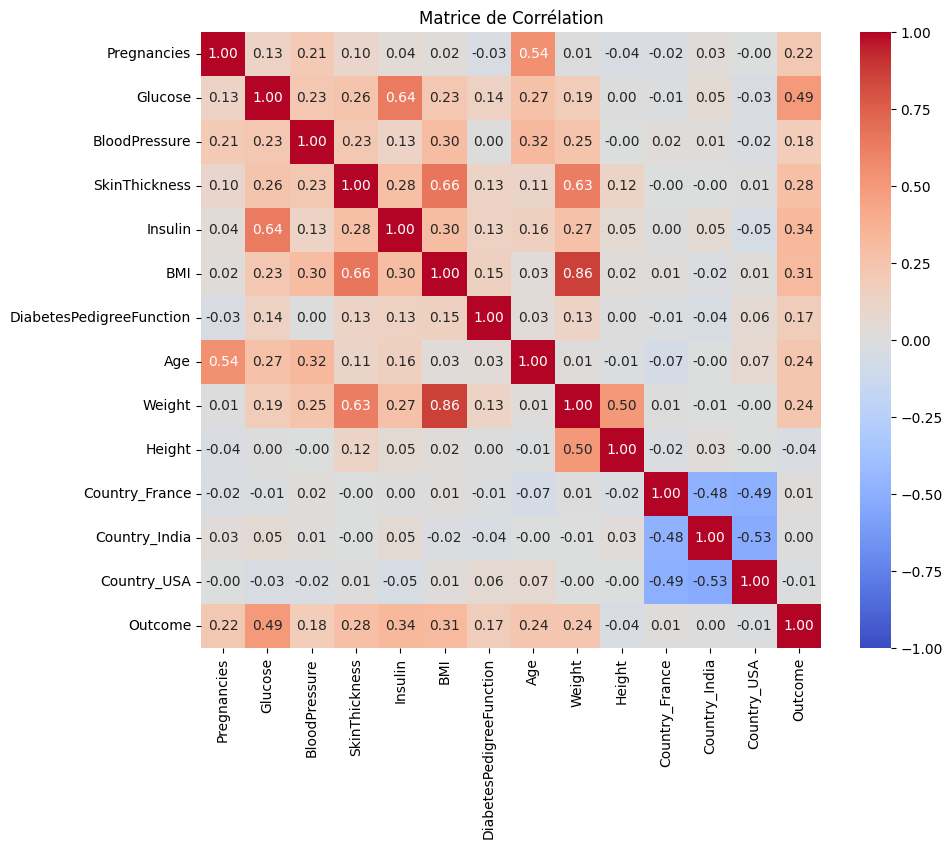

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_standardized.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

#### 🔍 Sélection de Features sur Base de la Matrice de Corrélation
Nous allons utiliser la matrice de corrélation pour analyser les relations entre les variables et sélectionner les plus pertinentes pour notre analyse. Expliquez en la commentant, ce que fait la fonction ci-dessous.

In [41]:
def select_features(df):
    # 1. Calcule la corrélation absolue avec 'Outcome' et trie les résultats
    corr_target = df_standardized.corr()['Outcome'].abs().sort_values(ascending=False)
    
    # 2. Sélectionne les features ayant une corrélation > 0.2
    selected_features = corr_target[corr_target > 0.2].index.tolist()
    
    # 3. Affiche les features sélectionnées
    print(selected_features)
    
    # 4. Retourne un nouveau DataFrame avec uniquement les features sélectionnées
    return df[selected_features]

select_features(df_standardized)

['Outcome', 'Glucose', 'Insulin', 'BMI', 'SkinThickness', 'Weight', 'Age', 'Pregnancies']


,Outcome,Glucose,Insulin,BMI,SkinThickness,Weight,Age,Pregnancies
0,1,0.864496,0.536662,0.166748,0.659145,0.417851,1.425995,0.639947
1,0,-1.206083,-0.728840,-0.850846,0.034974,-0.876940,-0.190672,-0.844885
2,1,2.014818,0.871289,-1.330568,-0.443557,-1.487759,-0.105584,1.233880
3,0,-1.074618,-0.572681,-0.632790,-0.589197,-0.107015,-1.041549,-0.844885
4,1,0.502966,0.177697,1.547769,0.659145,1.553994,-0.020496,-1.141852
...,...,...,...,...,...,...,...,...
763,0,-0.680222,0.299380,0.064989,2.011515,0.439797,2.532136,1.827813
764,0,0.009971,-0.154903,0.631934,-0.173083,1.015412,-0.531023,-0.547919
765,0,-0.022895,-0.390156,-0.908994,-0.589197,-0.689488,-0.275760,0.342981
766,1,0.141437,-0.203576,-0.342049,-0.714031,0.284349,1.170732,-0.844885


#### 🔍 Transformation automatique du dataset
La bibliothèque Scikit-learn permet d'écrire des transformateurs maison. Ces derniers permettent de définir soit même les tranformations à apporter à un jeu de données avant utilisation dans un modèle. Ci-dessous, vous trouverez un exemple incomplet de tranformateur. 

1. Complétez la méthode `transform` pour effectuer sur un dataset X l'ensemble des tranformations nécessaires, en vous basant sur les fonctions écritent précedemment.  
2. Appliquez ce transformateur au jeu de données initial.

In [42]:
class DataCleaningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, resampling_method, data_completion_method, outlier_threshold):
        self.resampling_method = resampling_method
        self.data_completion_method = data_completion_method
        self.outlier_threshold = outlier_threshold

    def fit(self, X, y=None):
        return self  

    def transform(self, X):
        # Copie du DataFrame pour éviter de modifier l'original
        df = X.copy()
        
        # OneHotEncoding
        df_encoded = pd.get_dummies(data=df, columns=['Country'])
        
        # Data Imputation
        na_columns = df_encoded.columns[df_encoded.isna().any()].tolist()
        df_imputed = self.data_completion_method(df_encoded, na_columns)
        
        # Remove Outliers
        df_outliers_removed = remove_outliers(df_imputed, self.outlier_threshold)
        
        # Resampling
        df_resampled = self.resampling_method(df_outliers_removed)
        # Réinitialisation de l'index après le resampling
        df_resampled = df_resampled.reset_index(drop=True)
        
        # Normalization (méthode Min-Max Scaling)
        df_normalized = min_max_scaling(df_resampled)
        # Réinitialisation de l'index après la normalisation
        df_normalized = df_normalized.reset_index(drop=True)
        
        return df_normalized

# Application du transformateur
transf = DataCleaningTransformer(oversampling, data_imputation, 2)
df_transformed = transf.transform(df_dc)
df_transformed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Weight,Height,Country_France,Country_India,Country_USA,Outcome
0,0.058824,0.266234,0.428571,0.468085,0.095639,0.242075,0.123529,0.166667,0.257665,0.474644,0.0,0.0,1.0,0
1,0.058824,0.292208,0.428571,0.340426,0.118797,0.285303,0.040271,0.000000,0.398727,0.721891,1.0,0.0,0.0,0
2,0.294118,0.467532,0.510204,0.259574,0.109474,0.213256,0.055656,0.150000,0.229268,0.457318,0.0,1.0,0.0,0
3,0.588235,0.461039,0.551020,0.578723,0.171128,0.492795,0.025339,0.133333,0.749539,1.000000,0.0,0.0,1.0,0
4,0.235294,0.428571,0.693878,0.591489,0.226466,0.559078,0.051131,0.150000,0.548166,0.564158,1.0,0.0,0.0,0
